# Scipy -- Library of scientific algorithms for Python

Based on lecture at http://github.com/jrjohansson/scientific-python-lectures.

The SciPy framework builds on top of the low-level NumPy framework for multidimensional arrays, and provides a large number of higher-level scientific algorithms. Some of the topics that SciPy covers are:

* Special functions ([scipy.special](http://docs.scipy.org/doc/scipy/reference/special.html))
* Integration ([scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html))
* Optimization ([scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html))
* Interpolation ([scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html))
* Fourier Transforms ([scipy.fftpack](http://docs.scipy.org/doc/scipy/reference/fftpack.html))
* Signal Processing ([scipy.signal](http://docs.scipy.org/doc/scipy/reference/signal.html))
* Linear Algebra ([scipy.linalg](http://docs.scipy.org/doc/scipy/reference/linalg.html))
* Sparse Eigenvalue Problems ([scipy.sparse](http://docs.scipy.org/doc/scipy/reference/sparse.html))
* Statistics ([scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html))
* Multi-dimensional image processing ([scipy.ndimage](http://docs.scipy.org/doc/scipy/reference/ndimage.html))
* File IO ([scipy.io](http://docs.scipy.org/doc/scipy/reference/io.html))

Each of these submodules provides a number of functions and classes that can be used to solve problems in their respective topics.

In this lecture we will look at how to use some of these subpackages.

To access the SciPy package in a Python program, we start by importing everything from the `scipy` module.

WARNING: In the new version of python many functionalities are now moved from `scipy` to `numpy`, but they are still available in `scipy` and a deprecated warning is displayed. The work-around is to first import functions from `scipy` and after that from `numpy`, to overwrite scipy functions with the same name.

In [2]:
from scipy import *
from numpy import *

If we only need to use part of the SciPy framework we can selectively include only those modules we are interested in. For example, to include the linear algebra package under the name `la`, we can do:

In [3]:
import scipy.linalg as la

## Special functions

A large number of mathematical special functions are important for many computional physics problems. SciPy provides implementations of a very extensive set of special functions. For details, see the list of functions in the reference documention at http://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special. 

To demonstrate the typical usage of special functions we will look in more detail at the Bessel functions:

In [4]:
#
# The scipy.special module includes a large number of Bessel-functions
# Here we will use the functions jn and yn, which are the Bessel functions 
# of the first and second kind and real-valued order. We also include the 
# function jn_zeros and yn_zeros that gives the zeroes of the functions jn
# and yn.
#
from scipy.special import jn, yn, jn_zeros, yn_zeros

In [5]:
n = 0    # order
x = 0.0  # x-point

# Bessel function of first kind
print("J_%d(%f) = %f" % (n, x, jn(n, x)))

x = 1.0
# Bessel function of second kind
print("Y_%d(%f) = %f" % (n, x, yn(n, x)))

J_0(0.000000) = 1.000000
Y_0(1.000000) = 0.088257


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image

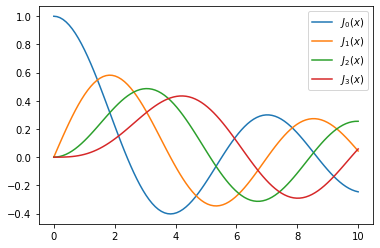

In [7]:
x = linspace(0, 10, 100)


for n in range(4):
    plt.plot(x, jn(n, x), label=r"$J_%d(x)$" % n)
plt.legend(loc='best');

## Integration

### Numeric integration with general purpose quadrature

Numerical evaluation of a function of the type

$\displaystyle \int_a^b f(x) dx$

is called *numerical quadrature*, or simply *quadature*. SciPy provides a series of functions for different kind of quadrature, for example the `quad`, `dblquad` and `tplquad` for single, double and triple integrals, respectively.



In [8]:
from scipy.integrate import quad, dblquad, tplquad

The `quad` function takes a large number of optional arguments, which can be used to fine-tune the behaviour of the function (try `help(quad)` for details).

The basic usage is as follows:

In [9]:
x_lower, x_upper = 0.0, 1.0
val, abserr = quad( lambda x: x**2, x_lower, x_upper)
print('Value=', val, 'error=', abserr)

Value= 0.33333333333333337 error= 3.700743415417189e-15


If we need to pass extra arguments to integrand function we can use the `args` keyword argument. Let's say we want to evaluate

$f(x) = \displaystyle \int_0^x \frac{j_n(t)}{t} dt$

In [10]:
f2 = lambda t,n,m: jn(n,t)/t
n=2
m=4
def f3(t,n,m):
    return jn(n,t)/t


In [11]:
# First specific case for x=1, n=1
quad(f3, 0, 1, args=(1,2))[0]

0.47967982434482676

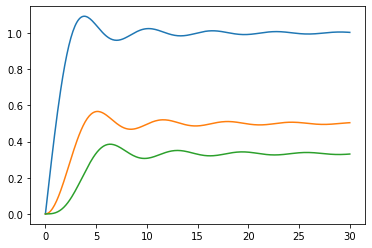

In [12]:
xs = linspace(1e-10,30,300)
ns = 1

for ns in range(1,4):
    fs=[quad(lambda t,n: jn(n, t)/t, 0, x, args=(ns,))[0] for x in xs]
    plt.plot(xs,fs)

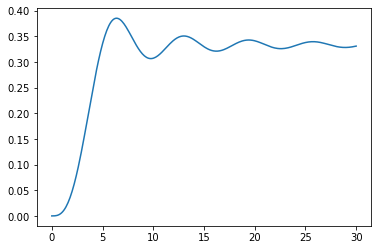

In [13]:
plt.plot(xs,fs);

Higher-dimensional integration works in the same way:

In [14]:
def integrand(x, y):
    return exp(-x**2-y**2)

x_a = 0  
x_b = 10
y_a = 0
y_b = 10

val, abserr = dblquad(integrand, x_a, x_b, lambda x : y_a, lambda x: y_b)

val, abserr = dblquad(integrand, x_a, x_b, y_a, y_b)

print(val, abserr)

0.7853981633974476 1.3753098510218528e-08


Note that we pass lambda functions for the limits for the y integration, since these in general can be functions of x.

\begin{equation}
\int_{x_a}^{x_b} \int_{y_a(x)}^{y_b(x)} f(x,y) dy dx
\end{equation}

## Ordinary differential equations (ODEs)

SciPy provides two different ways to solve ODEs: An API based on the function `odeint`, and object-oriented API based on the class `ode`. Usually `odeint` is easier to get started with, but the `ode` class offers some finer level of control.

Here we will use the `odeint` functions. For more information about the class `ode`, try `help(ode)`. It does pretty much the same thing as `odeint`, but in an object-oriented fashion.

To use `odeint`, first import it from the `scipy.integrate` module

In [15]:
from scipy.integrate import odeint, ode

A system of ODEs should be formulated in standard form, which is:

$y' = f(y, t)$

where 

$y = [y_1(t), y_2(t), ..., y_n(t)]$ 

and $f$ is some function that gives the derivatives of the function $y_i(t)$. To solve an ODE we need to know the function $f$ and an initial condition, $y(0)$.

Note that higher-order ODEs can always be written in this form by introducing new variables for the intermediate derivatives.

Once we have defined the Python function `f` and array `y_0` (that is $f$ and $y(0)$ in the mathematical formulation), we can use the `odeint` function as:

    y_t = odeint(f, y_0, t)

where `t` is and array with time-coordinates for which to solve the ODE problem. `y_t` is an array with one row for each point in time in `t`, where each column corresponds to a solution `y_i(t)` at that point in time. 

We will see how we can implement `f` and `y_0` in Python code in the examples below.

#### Example: double pendulum

Let's consider a physical example: The double compound pendulum, described in some detail here: http://en.wikipedia.org/wiki/Double_pendulum

In [16]:
from IPython.display import Image
Image(url='http://upload.wikimedia.org/wikipedia/commons/c/c9/Double-compound-pendulum-dimensioned.svg')

The equations of motion of the pendulum are given on the wiki page:

${\dot \theta_1} = \frac{6}{m\ell^2} \frac{ 2 p_{\theta_1} - 3 \cos(\theta_1-\theta_2) p_{\theta_2}}{16 - 9 \cos^2(\theta_1-\theta_2)}$

${\dot \theta_2} = \frac{6}{m\ell^2} \frac{ 8 p_{\theta_2} - 3 \cos(\theta_1-\theta_2) p_{\theta_1}}{16 - 9 \cos^2(\theta_1-\theta_2)}.$

${\dot p_{\theta_1}} = -\frac{1}{2} m \ell^2 \left [ {\dot \theta_1} {\dot \theta_2} \sin (\theta_1-\theta_2) + 3 \frac{g}{\ell} \sin \theta_1 \right ]$

${\dot p_{\theta_2}} = -\frac{1}{2} m \ell^2 \left [ -{\dot \theta_1} {\dot \theta_2} \sin (\theta_1-\theta_2) +  \frac{g}{\ell} \sin \theta_2 \right]$

To make the Python code simpler to follow, let's introduce new variable names and the vector notation: $x = [\theta_1, \theta_2, p_{\theta_1}, p_{\theta_2}]$

${\dot x_1} = \frac{6}{m\ell^2} \frac{ 2 x_3 - 3 \cos(x_1-x_2) x_4}{16 - 9 \cos^2(x_1-x_2)}$

${\dot x_2} = \frac{6}{m\ell^2} \frac{ 8 x_4 - 3 \cos(x_1-x_2) x_3}{16 - 9 \cos^2(x_1-x_2)}$

${\dot x_3} = -\frac{1}{2} m \ell^2 \left [ {\dot x_1} {\dot x_2} \sin (x_1-x_2) + 3 \frac{g}{\ell} \sin x_1 \right ]$

${\dot x_4} = -\frac{1}{2} m \ell^2 \left [ -{\dot x_1} {\dot x_2} \sin (x_1-x_2) +  \frac{g}{\ell} \sin x_2 \right]$

In [17]:
help(odeint)

Help on function odeint in module scipy.integrate.odepack:

odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0, tfirst=False)
    Integrate a system of ordinary differential equations.
    
    .. note:: For new code, use `scipy.integrate.solve_ivp` to solve a
              differential equation.
    
    Solve a system of ordinary differential equations using lsoda from the
    FORTRAN library odepack.
    
    Solves the initial value problem for stiff or non-stiff systems
    of first order ode-s::
    
        dy/dt = func(y, t, ...)  [or func(t, y, ...)]
    
    where y can be a vector.
    
    .. note:: By default, the required order of the first two arguments of
              `func` are in the opposite order of the arguments in the system
              definition function used by the `scipy.integrate.ode` class and
     

In [18]:
def dx(x,t):
    """
    The right-hand side of the pendulum ODE
    x=[x1,x2,x3,x4]
    """
    g, L, m = 9.82, 1., 1.
    x1,x2,x3,x4 = x
    c1 = 1/(m*L**2)
    dx1 = 6.*c1 * (2*x3-3*cos(x1-x2)*x4)/(16.-9.*cos(x1-x2)**2)
    dx2 = 6.*c1 * (8*x4-3*cos(x1-x2)*x3)/(16.-9.*cos(x1-x2)**2)
    dx3 = -0.5/c1 * (dx1*dx2 * sin(x1-x2) + 3*g/L * sin(x1))
    dx4 = -0.5/c1 * (-dx1*dx2 * sin(x1-x2)+ g/L * sin(x2))
    return array([dx1,dx2,dx3,dx4])

In [19]:
# choose an initial state
x0 = [pi/4, pi/2, 0, 0]

# time coodinate to solve the ODE for: from 0 to 10 seconds
t = linspace(0, 10, 250)

In [20]:
# solve the ODE problem
x = odeint(dx, x0, t)

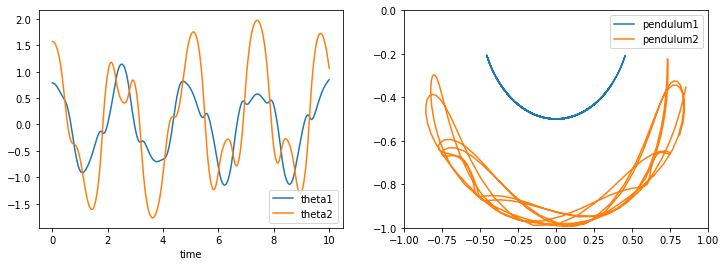

In [21]:
# plot the angles as a function of time
fig, axes = plt.subplots(1,2,figsize=(12,4))
axes[0].plot(t, x[:, 0], label="theta1")
axes[0].plot(t, x[:, 1], label="theta2")
axes[0].legend(loc='best')
axes[0].set_xlabel('time')

L = 0.5
x1 =  L * sin(x[:, 0])
y1 = -L * cos(x[:, 0])

x2 = x1 + L * sin(x[:, 1])
y2 = y1 - L * cos(x[:, 1])
    
axes[1].plot(x1, y1, label="pendulum1")
axes[1].plot(x2, y2, label="pendulum2")
axes[1].set_ylim([-1, 0])
axes[1].set_xlim([-1, 1])
axes[1].legend(loc='best');

examples for subplot creation: 
https://towardsdatascience.com/the-many-ways-to-call-axes-in-matplotlib-2667a7b06e06

matplotlib examples:
https://matplotlib.org/3.1.1/gallery/index.html

See animation in `pendulum.py`.

(To get it work within jupyter seems a bit challenging at the moment.)

### Example: Damped harmonic oscillator

ODE problems are important in computational physics, so we will look at one more example: the damped harmonic oscillation. This problem is well described on the wiki page: http://en.wikipedia.org/wiki/Damping

The equation of motion for the damped oscillator is:

$\displaystyle \frac{\mathrm{d}^2x}{\mathrm{d}t^2} + 2\zeta\omega_0\frac{\mathrm{d}x}{\mathrm{d}t} + \omega^2_0 x = 0$

where $x$ is the position of the oscillator, $\omega_0$ is the frequency, and $\zeta$ is the damping ratio. To write this second-order ODE on standard form we introduce $p = \frac{\mathrm{d}x}{\mathrm{d}t}$:

$\displaystyle \frac{\mathrm{d}p}{\mathrm{d}t} = - 2\zeta\omega_0 p - \omega^2_0 x$

$\displaystyle \frac{\mathrm{d}x}{\mathrm{d}t} = p$

In the implementation of this example we will add extra arguments to the RHS function for the ODE, rather than using global variables as we did in the previous example. As a consequence of the extra arguments to the RHS, we need to pass an keyword argument `args` to the `odeint` function:

In [22]:
def dy(y, t, zeta, w0):
    """
    The right-hand side of the damped oscillator ODE
    """
    x, p = y #y[0], y[1]
    
    dx = p
    dp = -2 * zeta * w0 * p - w0**2 * x

    return array([dx, dp])

In [23]:
# initial state: 
y0 = [1.0, 0.0]

# time coodinate to solve the ODE for
t = linspace(0, 10, 1000)
w0 = 2*pi*1.0

In [24]:
# solve the ODE problem for three different values of the damping ratio

y1 = odeint(dy, y0, t, args=(0.0, w0)) # undamped
y2 = odeint(dy, y0, t, args=(0.2, w0)) # under damped
y3 = odeint(dy, y0, t, args=(1.0, w0)) # critial damping
y4 = odeint(dy, y0, t, args=(5.0, w0)) # over damped

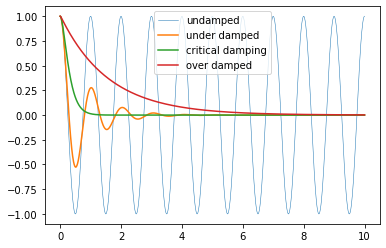

In [25]:
plt.plot(t, y1[:,0], label="undamped", linewidth=0.5)
plt.plot(t, y2[:,0], label="under damped")
plt.plot(t, y3[:,0], label=r"critical damping")
plt.plot(t, y4[:,0], label="over damped")
plt.legend();

## Fourier transform

Fourier transforms are one of the universal tools in computational physics, which appear over and over again in different contexts. SciPy provides functions for accessing the classic [FFTPACK](http://www.netlib.org/fftpack/) library from NetLib, which is an efficient and well tested FFT library written in FORTRAN. The SciPy API has a few additional convenience functions, but overall the API is closely related to the original FORTRAN library.

To use the `fftpack` module in a python program, include it using:

In [26]:
from scipy.fftpack import *
from numpy.fft import fftfreq

To demonstrate how to do a fast Fourier transform with SciPy, let's look at the FFT of the solution to the damped oscillator from the previous section:

In [27]:
# calculate the fast fourier transform
# y2 is the solution to the under-damped oscillator from the previous section
F = fft(y2[:,0]) 

# calculate the frequencies for the components in F
w = fftfreq(len(t), t[1]-t[0])

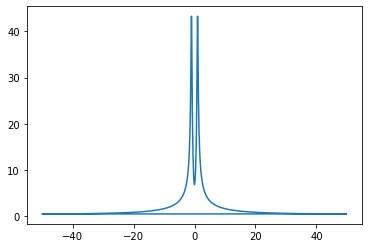

In [28]:
plt.plot(w, abs(F));

Properties of Fourier transform of a real signal:
\begin{eqnarray}
&& F(\omega) = \int e^{i\omega t} x(t) dt\\
&& F^*(\omega) = F(-\omega)\\
&& Re(F(\omega)) = Re(F(-\omega))\\
&& Im(F(\omega)) = -Im(F(-\omega))
\end{eqnarray}

(-2.0, 2.0)

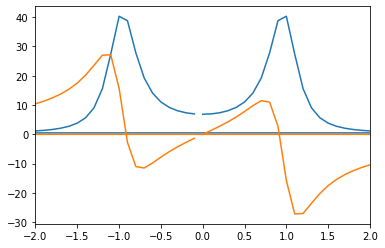

In [29]:
plt.plot(w,F.real)
plt.plot(w,F.imag)
plt.xlim(-2,2)

Since the signal is real, the spectrum is symmetric. We therefore only need to plot the part that corresponds to the postive frequencies. To extract that part of the `w` and `F` we can use some of the indexing tricks for NumPy arrays that we saw in Lecture 2:

In [30]:
indices = where(w > 0) # select only indices for elements that corresponds to positive frequencies
w_pos = w[indices]
F_pos = F[indices]

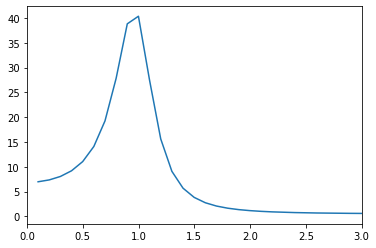

In [31]:
plt.plot(w_pos,F_pos.real);
plt.xlim(0,3);

As expected, we now see a peak in the spectrum that is centered around 1, which is the frequency we used in the damped oscillator example.

## Optimization

Optimization (finding minima or maxima of a function) is a large field in mathematics, and optimization of complicated functions or in many variables can be rather involved. Here we will only look at a few very simple cases. For a more detailed introduction to optimization with SciPy see: http://scipy-lectures.github.com/advanced/mathematical_optimization/index.html

To use the optimization module in scipy first include the `optimize` module:

In [32]:
from scipy import optimize

### Finding a minima

Let's first look at how to find the minima of a simple function of a single variable:

In [33]:
def f(x):
    return 4*x**3 + (x-2)**2 + x**4

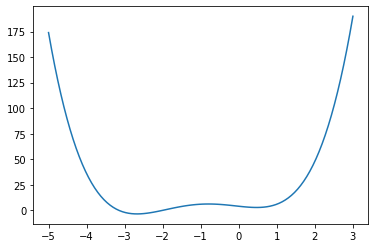

In [34]:
x = linspace(-5, 3, 100)
plt.plot(x, f(x));

We can use the `fmin_bfgs` function to find the minima of a function:

In [35]:
x_min = optimize.fmin_bfgs(f, -2)
x_min 

Optimization terminated successfully.
         Current function value: -3.506641
         Iterations: 5
         Function evaluations: 16
         Gradient evaluations: 8


array([-2.67298151])

In [36]:
optimize.fmin_bfgs(f, 0.5) 

Optimization terminated successfully.
         Current function value: 2.804988
         Iterations: 3
         Function evaluations: 10
         Gradient evaluations: 5


array([0.46961745])

We can also use the `brent` or `fminbound` functions. They have a bit different syntax and use different algorithms. 

In [37]:
optimize.brent(f, brack=(1,2))

0.4696174340948085

In [38]:
optimize.fminbound(f, -4, 2)

-2.6729822917513886

### Finding a solution to a function, i.e., zeros

To find the root for a function of the form $f(x) = 0$ we can use the `fsolve` function. 

It is based on Powell's hybrid method as implemented in MINPACK’s library (hybrd):
https://www.extremeoptimization.com/Documentation/Mathematics/Solving-Equations/Solving-Systems-of-Non-Linear-Equations.aspx

*Powell's dogleg method, also called Powell's hybrid method, attempts to minimize the sum of the squares of the function values. It does this using a combination of **Newton's** method and the **steepest descent** method. This is a so-called trust region method. This means that every step moves the current point to within a finite region. This makes the method more stable than Newton's method.*


*On the other hand, the fact that the method is, in essence, a specialized minimizer means that the algorithm can get stuck in a local minimum that does not correspond to a solution of the system of equations.*


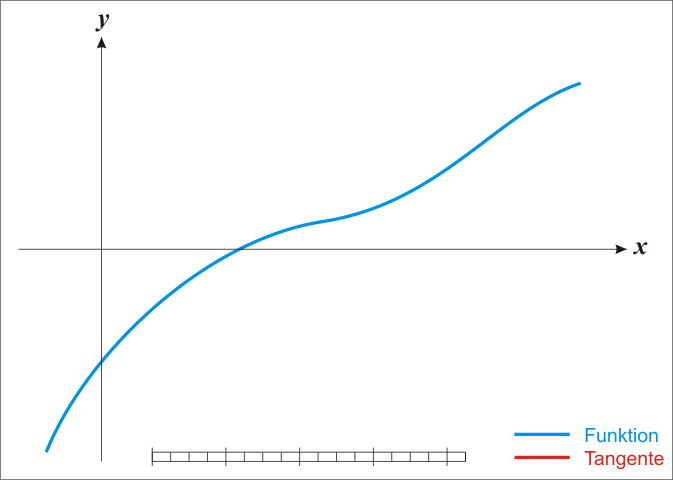

In [39]:
Image('https://upload.wikimedia.org/wikipedia/commons/e/e0/NewtonIteration_Ani.gif')

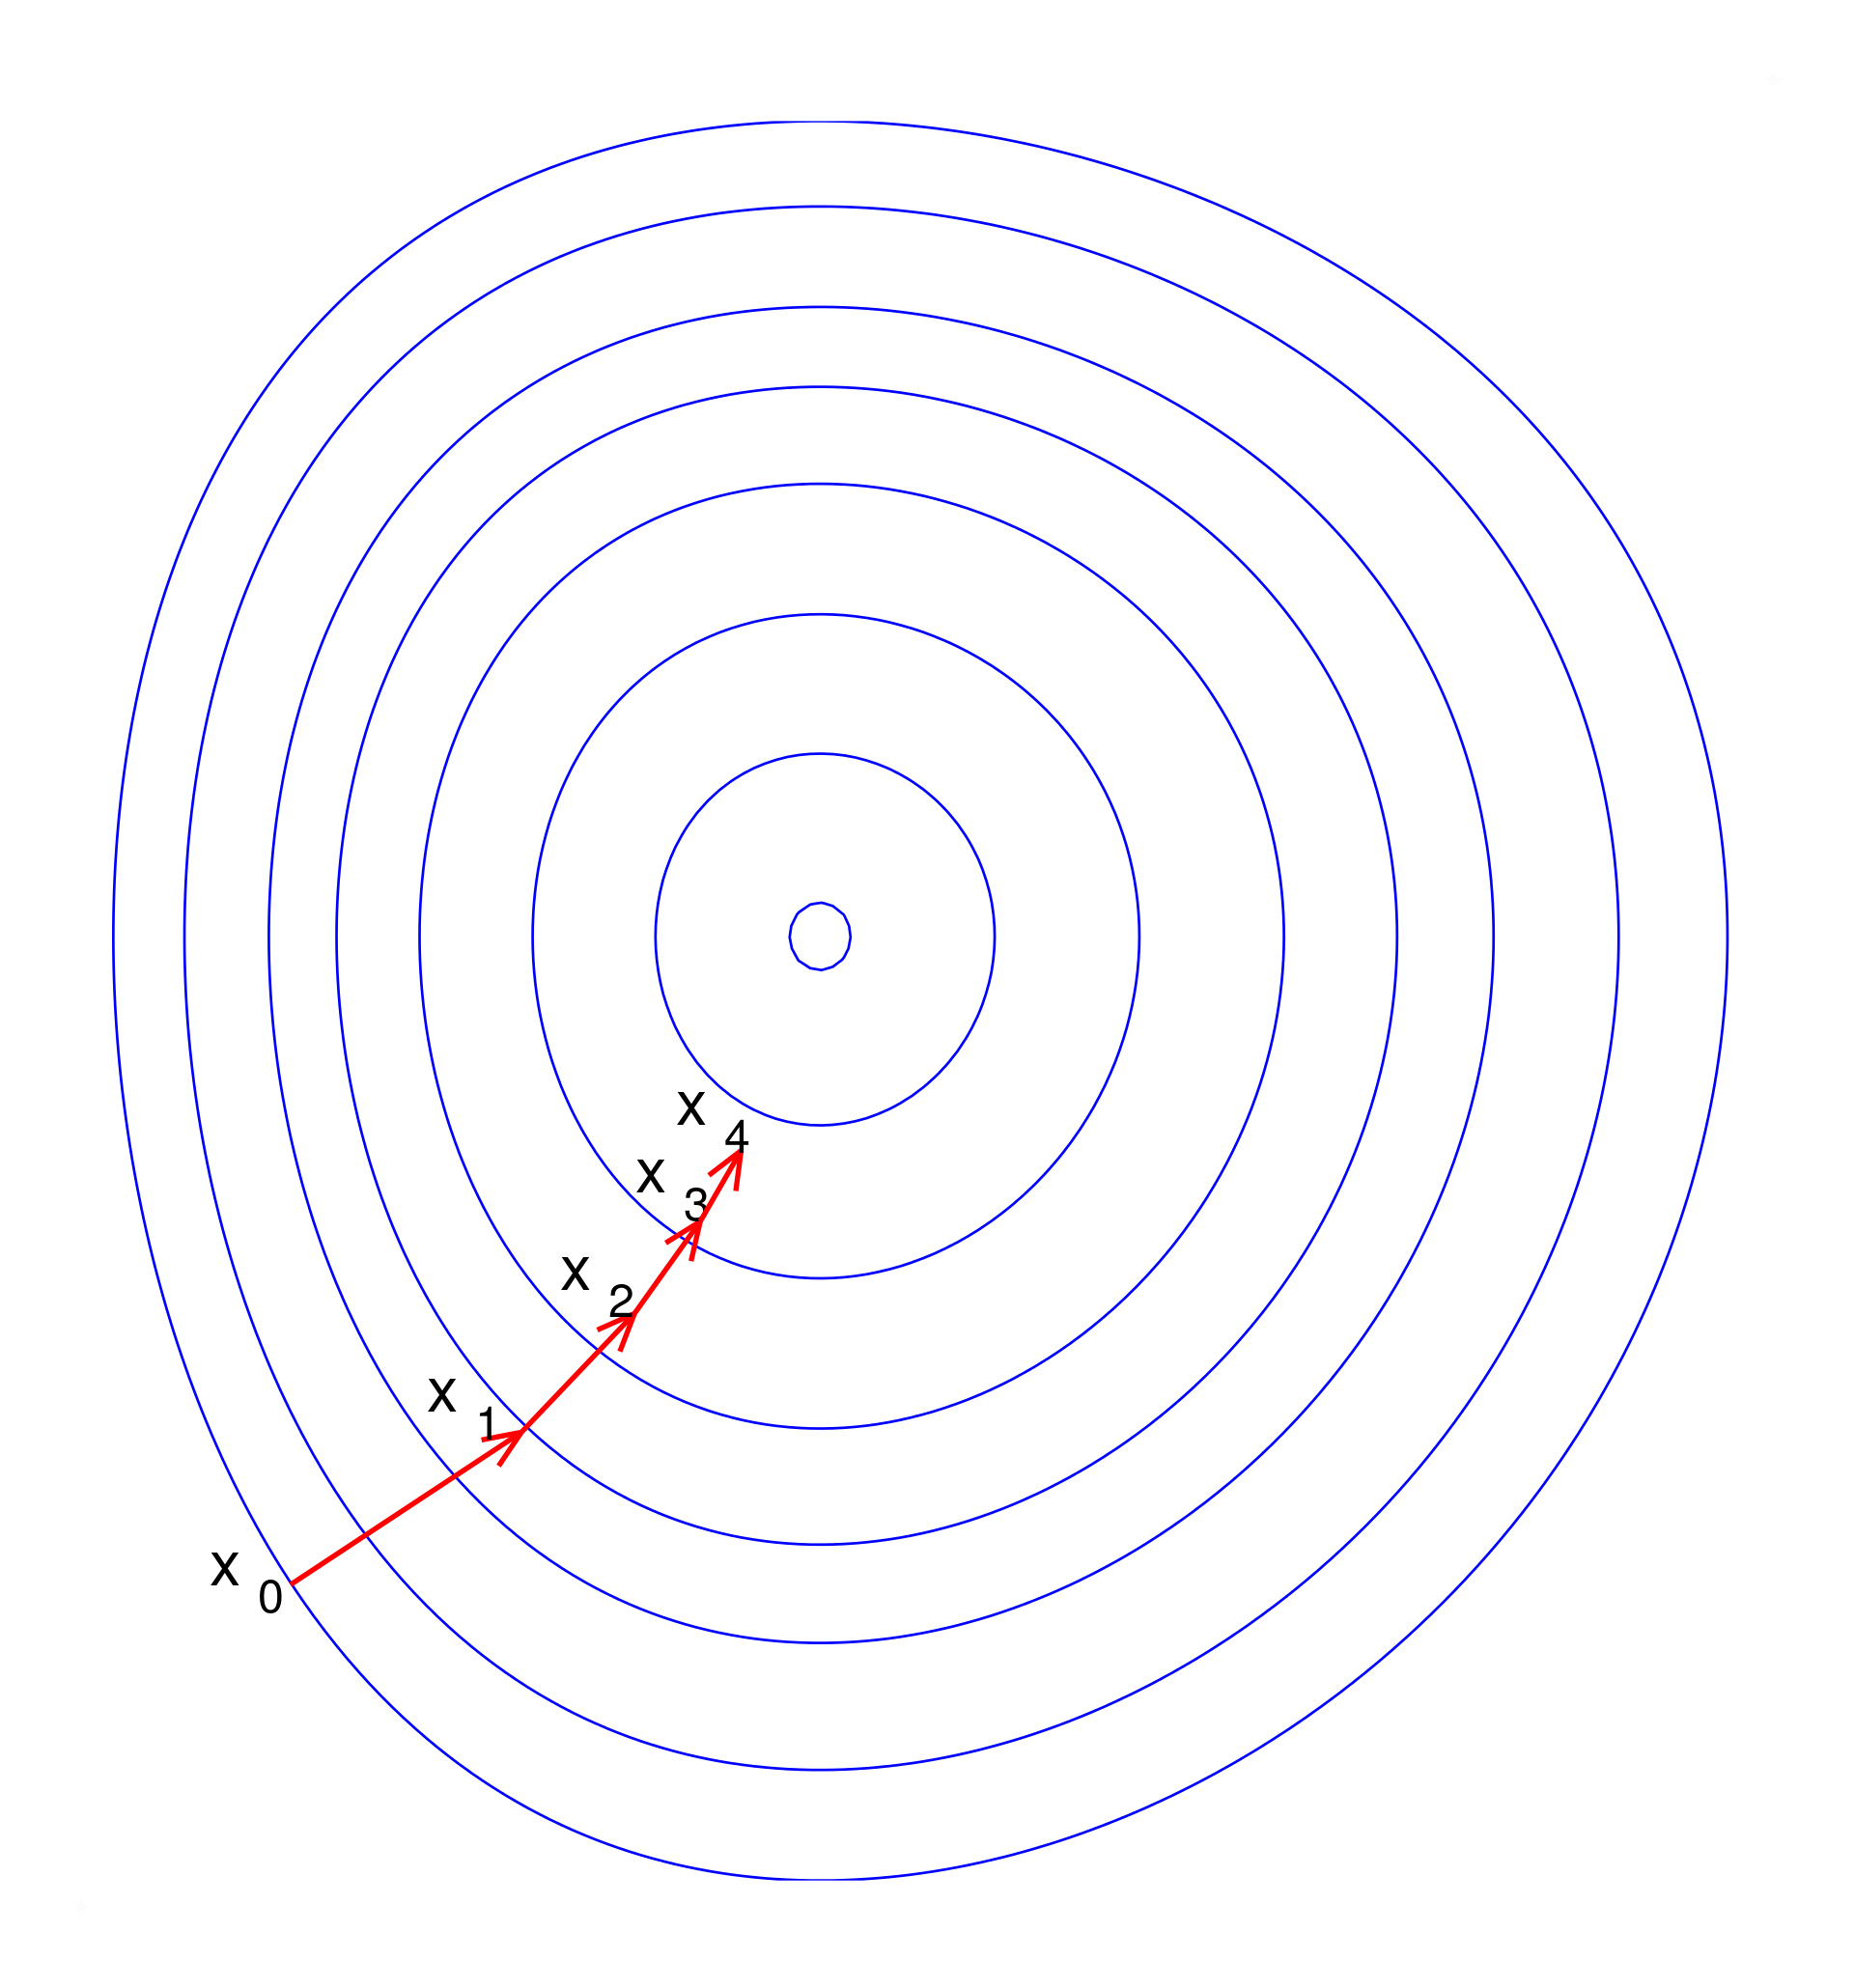

In [40]:
Image('https://upload.wikimedia.org/wikipedia/commons/thumb/f/ff/Gradient_descent.svg/1920px-Gradient_descent.svg.png')


To use fsolve, we need an initial guess: 

In [41]:
omega_c = 3.0
def f(omega):
    # a transcendental equation: resonance frequencies of a low-Q SQUID terminated microwave resonator
    return tan(2*pi*omega) - omega_c/omega

(-5.0, 5.0)

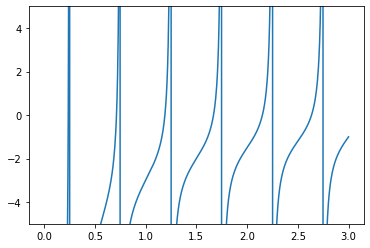

In [42]:
x = linspace(1e-6, 3, 1000)
y = f(x)
plt.plot(x,y)
plt.ylim(-5,5)

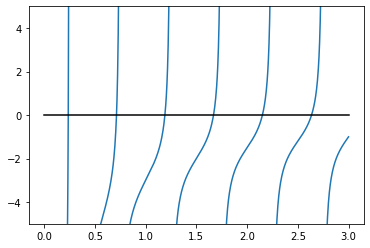

In [43]:
x = linspace(1e-6, 3, 1000)
y = f(x)
mask = where(abs(y) > 50)
x[mask] = y[mask] = NaN # get rid of vertical line when the function flip sign

plt.plot(x, y)
plt.plot([0, 3], [0, 0], 'k')
plt.ylim(-5,5);

In [45]:
optimize.fsolve(f, 0.1)

array([0.23743014])

In [46]:
optimize.fsolve(f, 0.6)

array([0.71286972])

In [47]:
optimize.fsolve(f, 1.1)

array([1.18990285])

Change of sign can occur when there is a zero or a pole. 
To use bracketing technique, we need to carefully bracket the zeros (and not the poles)

In [48]:
f(0.01),f(0.5)

(-299.93708533274634, -6.0)

In [49]:
f(0.001),f(0.25),f(0.3),f(0.73)

(-2999.993716732008,
 1.6331239353195358e+16,
 -13.077683537175254,
 3.806226047209912)

In [50]:
[optimize.toms748(f,0.01,0.25),optimize.toms748(f, 0.3, 0.73)]

[0.2374301406360339, 0.7128697158579146]

## Interpolation

Interpolation is simple and convenient in scipy: The `interp1d` function, when given arrays describing X and Y data, returns and object that behaves like a function that can be called for an arbitrary value of x (in the range covered by X), and it returns the corresponding interpolated y value:

In [51]:
from scipy.interpolate import *
from numpy import random

In [52]:
def f(x):
    return sin(x)

In [53]:
n = linspace(0, 9, 10)  
x = linspace(0, 9, 300)

y_meas = f(n) + 0.05 * random.randn(len(n)) # simulate measurement with noise
y_real = f(x)

linear_interpolation = interp1d(n, y_meas, kind='linear')
y_interp1 = linear_interpolation(x)

cubic_interpolation = interp1d(n, y_meas, kind='cubic')
y_interp2 = cubic_interpolation(x)

cubic_smooth = UnivariateSpline(n, y_meas, s=0.05)
y_interp3 = cubic_smooth(x)

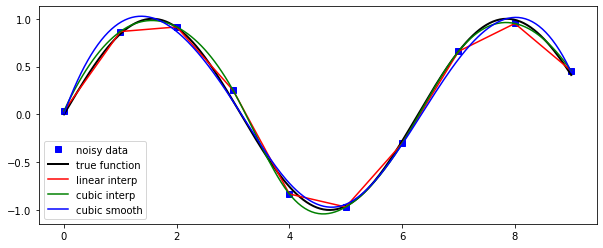

In [54]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(n, y_meas, 'bs', label='noisy data')
ax.plot(x, y_real, 'k', lw=2, label='true function')
ax.plot(x, y_interp1, 'r', label='linear interp')
ax.plot(x, y_interp2, 'g', label='cubic interp')
ax.plot(x, y_interp3, 'b', label='cubic smooth')
ax.legend(loc=3);

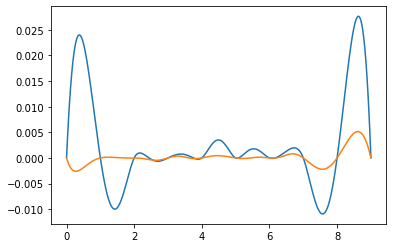

In [55]:
cubic_interpolation = interp1d(n, f(n), kind='cubic')
diff = cubic_interpolation(x)-f(x)

cubic_smooth = UnivariateSpline(n, f(n), s=0.0, k=4)
diff2 = cubic_smooth(x)-f(x)

plt.plot(x, diff)
plt.plot(x, diff2)

`interpolate.make_interp_spline` allows boundary condition at the two ends.

`bc_type2 -- tuple or None`

Default is `None`, which means choosing the boundary conditions automatically. Otherwise, it must be a length-two tuple where the first element sets the boundary conditions at `x[0]` and the second element sets the boundary conditions at `x[-1]`. Each of these must be an iterable of pairs (order, value) which gives the values of derivatives of specified orders at the given edge of the interpolation interval. Alternatively, the following string aliases are recognized:`

* "clamped": The first derivatives at the ends are zero. This is equivalent to bc_type=([(1, 0.0)], [(1, 0.0)]).
* "natural": The second derivatives at ends are zero. This is equivalent to bc_type=([(2, 0.0)], [(2, 0.0)]).
* "not-a-knot" (default): The first and second segments are the same polynomial. This is equivalent to having bc_type=None. In this case the spline requires that the third derivative of the spline is continuous at `x[0]` and `x[-1]`

Also `interp2d` exists with similar syntax


`UnivariateSpline` is object oriented analog for spline interpolation, and offers a bit more functionality: s=Positive smoothing factor

## Further reading

* http://www.scipy.org - The official web page for the SciPy project.
* http://docs.scipy.org/doc/scipy/reference/tutorial/index.html - A tutorial on how to get started using SciPy. 
* https://github.com/scipy/scipy/ - The SciPy source code. 